# Project: Identifying factors that affect show/no show for a medical appointment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Out of over 110,000 medical appointments, about 30% of them were no shows. That is, patients did not show up to the appointment after scheduling the appointment. Data has been collected on all appointments and patients. I intend to explore the dataset and identify variables that can be used in predicting show/no-show. I will also analyze the effect of certain variables on show/no-show.

The dependent column is the `No-show` column that tells whether a patient showed up for their appointment or not.
The independent variables include:
* Gender
* Scholarship
* Alcoholism
* Hypertension
* Diabetes
* Handicap
* SMSReceived

Other characteristics include:
* Age
* Appointment date
* Schedule date
* Neighbourhood

The dataset can be accessed on [kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments).

More information on the scholarship variable can be found on [Wikipedia](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).

In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### Importing data

In [2]:
# reading data into a dataframe
df = pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')
# displaying first five rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Assessing data

In [3]:
#10 random rows of the dataframe
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
35219,3.264252e+13,5669221,F,2016-05-06T10:33:18Z,2016-05-30T00:00:00Z,53,SANTOS DUMONT,0,0,0,0,0,1,No
54912,5.177525e+13,5618861,F,2016-04-26T07:29:43Z,2016-05-02T00:00:00Z,53,DA PENHA,0,1,0,0,0,1,No
25155,4.855692e+13,5632994,M,2016-04-28T08:41:09Z,2016-05-09T00:00:00Z,44,ANDORINHAS,0,1,1,0,1,0,No
50707,6.927849e+14,5605306,F,2016-04-20T08:51:08Z,2016-05-13T00:00:00Z,18,JABOUR,0,0,0,0,0,0,No
1428,2.359689e+13,5447464,F,2016-03-09T10:10:44Z,2016-04-29T00:00:00Z,69,SANTA TEREZA,0,0,0,0,0,1,No
19869,4.662918e+14,5625367,F,2016-04-27T07:10:40Z,2016-05-11T00:00:00Z,17,BELA VISTA,0,0,0,0,0,1,Yes
27738,5.526357e+14,5570273,F,2016-04-12T07:42:08Z,2016-05-03T00:00:00Z,28,MARUÍPE,0,0,0,0,0,1,No
38905,2.643586e+13,5657191,M,2016-05-04T09:02:10Z,2016-05-04T00:00:00Z,74,SANTA TEREZA,0,1,0,0,0,0,No
83889,4.325636e+14,5666293,F,2016-05-05T16:23:51Z,2016-05-11T00:00:00Z,19,BOA VISTA,0,0,0,0,0,1,No
35462,6.677236e+12,5736544,F,2016-05-25T08:29:46Z,2016-05-25T00:00:00Z,52,JESUS DE NAZARETH,0,1,0,0,0,0,No


In [4]:
#last 5 rows in the dataframe
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# information on the columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.shape

(110527, 14)

The dataset has 14 columns and 110527 rows.

The data type of the `Scholarship`, `Hipertension`, `Diabetes`,`Alcoholism` and `SMS_received` columns in int64 because they contain numerical values but these values are actually categorical.

The data type of the `ScheduledDay` and `AppointmentDay` columns is int but they are timestamp columns.


In [7]:
#checking for nulls
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no nulls in the dataframe.

In [8]:
# checking for duplicates
df.duplicated().sum()

0

There are no duplicates in the dataframe

In [9]:
# value counts of the sms received column
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

0 stands for no and 1 stands for yes

In [10]:
# value counts of the scholarship column
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

0 stands for no scholarship and 1 stands for scholarship

In [11]:
# value counts of the Hipertension column
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

0 means the patient is not hypertensive and 1 means the patient is hypertensive

In [12]:
# value counts of the Diabetes column
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

0 means the patient does not have diabetes and 1 means they have diabetes

In [13]:
# value counts of the alcoholism column
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

0 means the patient is not involved in alcoholism and 1 means they are involved in alcoholism.

In [14]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

0 means no handicap and for the rest, the number signifies the number of handicaps.

In [15]:
# value counts of gender
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

F for female and M for male

In [16]:
# value counts of the no-show column
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

No means the patient showed and yes means they did not

In [17]:
# statistacal breakdown of the dataframe
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The min of the `Age` column is a negative number. This is a validity error as age cannot be in negatives.

### Data quality issues
* Negative age
* Misspelled column labels
* Wrong data types for some columns



#### Copying data

In [18]:
df_clean = df.copy()

I want to keep the original dataset as it is so I will be performing data cleaning on the new dataframe.

### Data cleaning

### Issue:
* Negative age

#### Define:
* drop rows with negative age

#### Code

In [19]:
#checking index of row with negative age value
df_clean.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


From the results above, I can tell that only one row has a negative `Age` value therefore I can drop this row from the dataframe.

In [20]:
#dropping row with negative age using row index
df_clean.drop([99832],inplace=True)

#### Test

In [21]:
#confirming removal of row with negative age
df_clean.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


No more rows with negative ages

### Issue:
* Wrong datatypes

#### Define:
* convert wrong dtypes to correct dtypes

#### Code

In [22]:
#changing the datatype of two columns
df_clean['AppointmentDay'] = pd.to_datetime(df_clean['AppointmentDay'])
df_clean['ScheduledDay'] = pd.to_datetime(df_clean['ScheduledDay'])

In [23]:
# changing int columns to category
columns = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']
for column in columns:
    df_clean[column] = df_clean[column].astype('category')

In [24]:
#changing dtype of ID columns to string
df_clean['PatientId'] = df_clean['PatientId'].astype(str)
df_clean['AppointmentID'] = df_clean['AppointmentID'].astype(str)

#### Test

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  object             
 1   AppointmentID   110526 non-null  object             
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  category           
 8   Hipertension    110526 non-null  category           
 9   Diabetes        110526 non-null  category           
 10  Alcoholism      110526 non-null  category           
 11  Handcap         110526 non-null  category           
 12  SMS_received    110526 non-null  category           
 13  No-show       

### Issue:
* Mispelled column names

#### Define:
* rename columns with mispelled labels

#### Code

In [26]:
#renaming columns
df_clean.rename(columns = {'PatientId':'PatientID',
                           'Hipertension':'Hypertension',
                           'Handcap':'Handicapped',
                           'No-show':'NoShow',
                           'SMS_received':'SMSReceived'},
                           inplace = True)

#### Test

In [27]:
#verifying the change
df_clean.columns

Index(['PatientID', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicapped', 'SMSReceived', 'NoShow'],
      dtype='object')

I changed the names of columns that were initially spelt wrongly or had symbols that could be removed.

In [28]:
# displaying first five rows
df_clean.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMSReceived,NoShow
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



### Gender

In [29]:
# distribution of patients who showed and those who didn't
df_clean['NoShow'].value_counts()

No     88207
Yes    22319
Name: NoShow, dtype: int64

88207 patients showed up for their appointment and 22319 patients did not show up

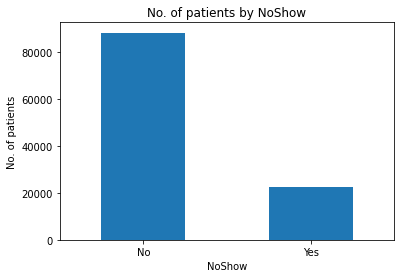

In [30]:
#plotting distribution of show and no show 
ax = df_clean['NoShow'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by NoShow',
        rot=0)
ax.set_xlabel('NoShow')
ax.set_ylabel('No. of patients');

The difference between the number of patients who showed up and those who did not is visualized above

In [31]:
#checking distribution of gender in the patients
df_clean['Gender'].value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

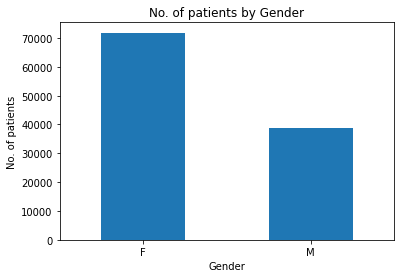

In [32]:
#plotting distribution of Gender on a histogram
ax = df_clean['Gender'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by Gender',
        rot=0)
ax.set_xlabel('Gender')
ax.set_ylabel('No. of patients');

From the value counts and graph above, we can tell that the patients are made up of more females than males.

In [33]:
# assigning number of female patients to a variable
f_count = df.query('Gender == "F"').count().Gender
f_count

71840

In [34]:
# assigning number of male patients to a variable
m_count = df.query('Gender == "M"').count().Gender
m_count

38687

In [35]:
#assigning the number of patients to a variable
patients_count = df['Gender'].count()
patients_count

110527

In [36]:
#calculating percentage of female patients 
f_percent = (f_count/patients_count)*100
f_percent

64.99769287142509

Females make up 65% of the patients

In [37]:
#calculating percentage of male patients
m_percent = (m_count/patients_count) * 100
m_percent

35.00230712857492

35% of the patients were males.

In [38]:
# pivot table with gender and no-show column 
df_ns = df_clean.groupby(['NoShow','Gender'],as_index=False).size()
ns_pivot = pd.pivot_table(df_ns, values = 'size',columns=['NoShow'],index='Gender')
ns_pivot

NoShow,No,Yes
Gender,,
F,57245,14594
M,30962,7725


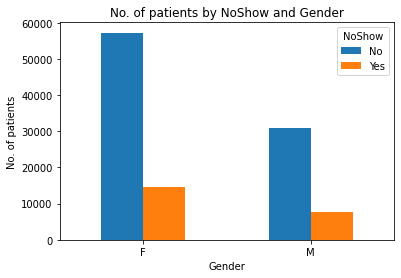

In [39]:
# visualizing the pivot table 
ax = ns_pivot.plot(
        kind='bar',
        title = 'No. of patients by NoShow and Gender',
        rot=0)
ax.set_xlabel('Gender')
ax.set_ylabel('No. of patients');

For each gender, majority showed up for their appointment.

In [40]:
# number of females who showed
f_show_count = df_clean.query('Gender == "F" & NoShow == "No"').count().Gender
print('Number of females who showed: ' + str(f_show_count))
# number of females who did not show
f_noshow_count = df_clean.query('Gender == "F" & NoShow == "Yes"').count().Gender
print('Number of females who did not show: ' + str(f_noshow_count))
# number of males who showed
m_show_count = df_clean.query('Gender == "M" & NoShow == "No"').count().Gender
print('Number of males who showed: ' + str(m_show_count))
#number of males who did not show
m_noshow_count = df_clean.query('Gender == "M" & NoShow == "Yes"').count().Gender
print('Number of males who did not show: ' + str(m_noshow_count))

Number of females who showed: 57245
Number of females who did not show: 14594
Number of males who showed: 30962
Number of males who did not show: 7725


In [41]:
#creating a function for calculating percentages
def percentage(value,total):
    var_percent = (sample/total)*100
    return var_percent

In [42]:
# creating a probability function
def probability(outcome,total):
    prob = (outcome/total)
    return prob

In [43]:
# probability of a female showing
f_show_prob = probability(f_show_count,f_count)
# rounding to two decimal places 
round(f_show_prob,2)

0.8

The probaility of a female showing up for their appointment is 0.8

In [44]:
# probability of a male showing
m_show_prob = probability(m_show_count,m_count)
round(m_show_prob,2)

0.8

The probability of a male showing up for their appointment is 0.8

* As the probability of both males and females showing up is 0.8, the gender of a patient is not important to predict whether they will show up for their appointment.

### Scholarship

In [45]:
#checking distribution of scholarship receipients
df_clean['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

Of the 110527 appointments, 99665 of the patients who booked the appointment were not on scholarship and 10861 patients were on scholarship.

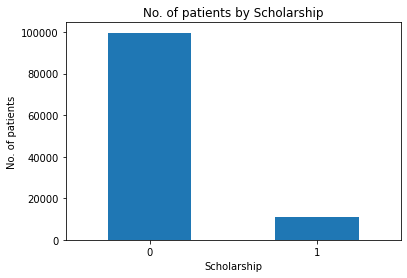

In [46]:
#plotting the distribution of patients based on scholarship status
ax = df['Scholarship'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by Scholarship',
        rot=0)
ax.set_xlabel('Scholarship')
ax.set_ylabel('No. of patients');

The difference is made clearer by the graph. Now I want to check if scholarship status has an impact on whether a patient will show up for an appointment or not.

In [47]:
#creating a pivot table for Scholarship and NoShow
df_sc = df_clean.groupby(['NoShow','Scholarship'],as_index=False).size()
sc_pivot = pd.pivot_table(df_sc, values = 'size',columns=['NoShow'],index='Scholarship')
sc_pivot

NoShow,No,Yes
Scholarship,,
0,79924,19741
1,8283,2578


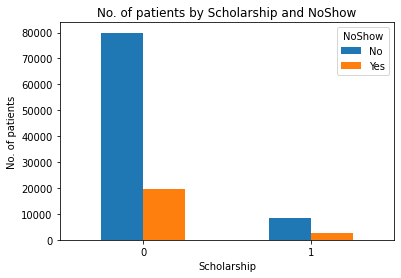

In [48]:
#plotting the pivot table on a grouped bar chart
ax = sc_pivot.plot(
        kind='bar',
        title = 'No. of patients by Scholarship and NoShow',
        rot=0)
ax.set_xlabel('Scholarship')
ax.set_ylabel('No. of patients');

The graph shows that for each scholarship status, majority of the patients showed up. I will compute the probabilities to draw a more statistical conclusion.

In [49]:
# variable for scholarship recipients
scholarship_count = df.query('Scholarship == 1').count().Scholarship
print('Number of patients on scholarship: ' + str(scholarship_count))
# variable for non scholarship patients
noscholarship_count = df.query('Scholarship == 0').count().Scholarship
print('Number of patients without scholarship: ' + str(noscholarship_count))

Number of patients on scholarship: 10861
Number of patients without scholarship: 99666


In [50]:
# number of scholarship recipients who showed up
scholarship_show = df_clean.query('Scholarship == 1 & NoShow == "No"').count().Scholarship
# probability of a scholarship recipient showing up
scholarship_show_prob = probability(scholarship_show,scholarship_count)
round(scholarship_show_prob,2)

0.76

The probability of a patient on scholarship showing up is 0.76

In [51]:
# number of no scholarship patients who showed up
noscholarship_show = df_clean.query('Scholarship == 0 & NoShow == "No"').count().Scholarship
# probability of a non scholarship patient showing up 
noscholarship_show_prob = probability(noscholarship_show,noscholarship_count)
round(noscholarship_show_prob,2)

0.8

The probability of a non-scholarship patient showing up is 0.8

* As the probability of a non-scholarship patient showing up is higher than the probability of a scholarship patient showing up, scholarship status can be used in the prediction of show/no-show.

### SMS received

In [52]:
# number of patients who did not receive sms
no_sms = df_clean.query('SMSReceived == 0').count().SMSReceived
print('Number of patients who did not receive SMS: ' + str(no_sms))
# no of patients who recieved an sms
sms_true = df_clean.query('SMSReceived == 1').count().SMSReceived
print('Number of patients who received SMS: ' + str(sms_true))

Number of patients who did not receive SMS: 75044
Number of patients who received SMS: 35482


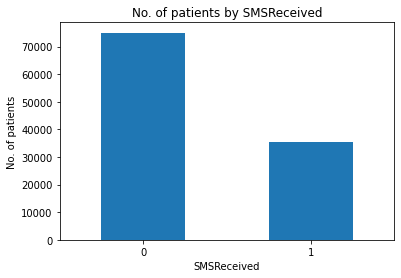

In [53]:
#plotting distribution of the value counts
ax = df_clean['SMSReceived'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by SMSReceived',
        rot=0)
ax.set_xlabel('SMSReceived')
ax.set_ylabel('No. of patients');

As depicted by the graph, majority of patients did not receive an sms.

In [54]:
#creating a pivot table for the SMSReceived and NoShow columns
df_sms = df_clean.groupby(['SMSReceived','NoShow'],as_index=False).size()
sms_pivot = pd.pivot_table(df_sms, values = 'size',columns=['NoShow'],index='SMSReceived')
sms_pivot

NoShow,No,Yes
SMSReceived,,
0,62509,12535
1,25698,9784


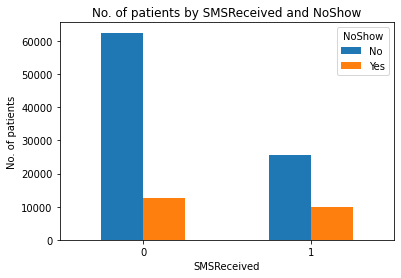

In [55]:
#visualizing the pivot table on a grouped bar chart
ax = sms_pivot.plot(
        kind='bar',
        title = 'No. of patients by SMSReceived and NoShow',
        rot=0)
ax.set_xlabel('SMSReceived')
ax.set_ylabel('No. of patients');

In [56]:
#number of patients who did not receive SMS and showed up
nosms_show = df_clean.query('SMSReceived == 0 & NoShow == "No"').count().SMSReceived
print('Number of patients who did not receive SMS and showed: ' + str(nosms_show))
#number of patients who received SMS and showed up
sms_show = df_clean.query('SMSReceived == 1 & NoShow == "No"').count().SMSReceived
print('Number of patients who received SMS and showed: ' + str(sms_show))

Number of patients who did not receive SMS and showed: 62509
Number of patients who received SMS and showed: 25698


I assigned variables to the various results from the pivot table.

In [57]:
# probability of a patient who did not receive sms showing up
nosms_show_prob = probability(nosms_show,no_sms)
round(nosms_show_prob,2)

0.83

The probability of a patient who did not receive SMS showing up is 0.83 

In [58]:
# probability of a patient who received SMS showing 
sms_show_prob = probability(sms_show,sms_true)
round(sms_show_prob,2)

0.72

The probability of a patient who received an sms showing up is 0.72

* As the probability of patients who did not receive SMS showing up is higher, SMS reception status can be used to predict whether a patient will show up for their appointment.

### Alcoholism

In [59]:
#checking distribution of alcoholism status 
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

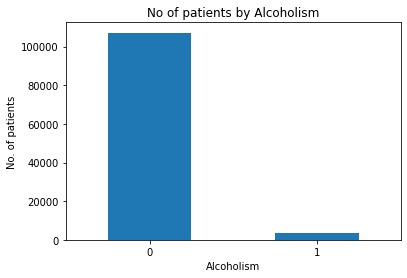

In [60]:
# plotting the results above 
ax = df_clean['Alcoholism'].value_counts().plot(
        kind='bar',
        title = 'No of patients by Alcoholism',
        rot=0)
ax.set_xlabel('Alcoholism')
ax.set_ylabel('No. of patients');

Most of the patients were not involved in alcoholism.

In [61]:
#creating a pivot table for the Alcoholism and NoShow columns
df_alcohol = df_clean.groupby(['NoShow','Alcoholism'],as_index=False).size()
alcoholism_pivot = pd.pivot_table(df_alcohol, 
        values = 'size',
        columns=['NoShow'],
        index='Alcoholism')
alcoholism_pivot

NoShow,No,Yes
Alcoholism,,
0,85524,21642
1,2683,677


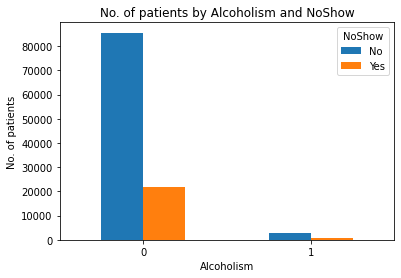

In [62]:
#plotting the pivot table above on a grouped bar chart
ax = alcoholism_pivot.plot(
        kind='bar',
        title='No. of patients by Alcoholism and NoShow',
        rot=0)
ax.set_xlabel('Alcoholism')
ax.set_ylabel('No. of patients');

In [63]:
#calculating number of patients involved in alcoholism and showed up
alcoholism_show = df_clean.query('Alcoholism == 1 & NoShow == "No"').count().Alcoholism
# number of patients involved in alcohol
alcoholism_count = df_clean.query('Alcoholism == 1').count().Alcoholism
# calculating probability
alcoholism_show_prob = probability(alcoholism_show,alcoholism_count)
round(alcoholism_show_prob,2)

0.8

The probability of a patient involved in alcoholism showing up is 0.8

In [64]:
# number of non alcoholic patients
no_alcoholism_count = df_clean.query('Alcoholism == 0').count().Alcoholism
#calculating number of patients who were not involved in alcoholism and showed up
no_alcoholism_show = df_clean.query('Alcoholism == 0 & NoShow == "No"').count().Alcoholism
# calculating probability
no_alcoholism_show_prob = probability(no_alcoholism_show,no_alcoholism_count)
round(no_alcoholism_show_prob,2)

0.8

The probability of a non-alcoholic patient showing up is 0.8

* The probabilities of alcoholic and non-alcoholic patients showing up is 0.8 therefore as an individual variable, alcoholism is not an important factor in predicting show/no-show.

### Hypertension

In [65]:
# distribution of hypertension
df_clean['Hypertension'].value_counts()

0    88725
1    21801
Name: Hypertension, dtype: int64

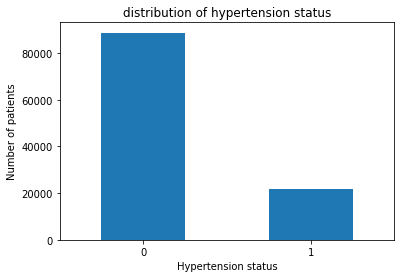

In [66]:
#plotting value counts
ax = df_clean['Hypertension'].value_counts().plot(
        kind='bar',
        title= 'distribution of hypertension status',
        rot=0)
ax.set_xlabel('Hypertension status')
ax.set_ylabel('Number of patients');

Majority of the patients were not hypertensive.

In [67]:
# pivot table of NoShow and Hypertension columns
df_hyper = df_clean.groupby(['NoShow','Hypertension'],as_index=False).size()
hyper_pivot = pd.pivot_table(df_hyper, 
        values = 'size',
        columns=['NoShow'],
        index='Hypertension')
hyper_pivot

NoShow,No,Yes
Hypertension,,
0,70178,18547
1,18029,3772


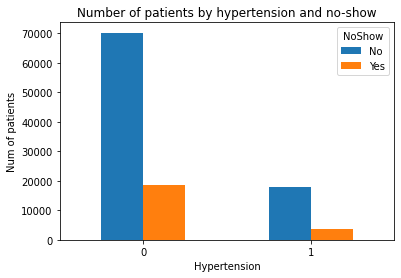

In [68]:
# plotting the pivot table on a grouped bar chart
ax = hyper_pivot.plot(
        kind='bar',
        title='Number of patients by hypertension and no-show',
        rot=0)
ax.set_xlabel('Hypertension')
ax.set_ylabel('Num of patients');

For each category, majority of patients showed up. I will calculate the probability of a patient from each category showing up.

In [69]:
# number of patients with hypertension that showed up
hyper_show = df_clean.query('Hypertension == 1 & NoShow == "No"').count().Hypertension
# number of patients with hypertension
hyper_count = df_clean.query('Hypertension == 1').count().Hypertension
# calculating probability
hyper_show_prob = probability(hyper_show,hyper_count)
round(hyper_show_prob,2)

0.83

The probability of a patient with hypertension showing up is 0.83.

In [70]:
# number of patients without hypertension that showed up
no_hyper_show = df_clean.query('Hypertension == 0 & NoShow == "No"').count().Hypertension
# number of patients without hypertension
no_hyper_count = df_clean.query('Hypertension == 0').count().Hypertension
# calculating probability
no_hyper_show_prob = probability(no_hyper_show,no_hyper_count)
round(no_hyper_show_prob,2)

0.79

The probability of a patient with out hypertension showing up is 0.79

* Hypertension status can be used in the prediction of show/no-show.

### Diabetes

In [71]:
# distribution of diabetes status
df_clean['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [72]:
# pivot table of diabetes and no-show column
df_diabetes = df_clean.groupby(['NoShow','Diabetes'],as_index=False).size()
diabetes_pivot = pd.pivot_table(df_diabetes, 
        values = 'size',
        columns=['NoShow'],
        index='Diabetes')
diabetes_pivot

NoShow,No,Yes
Diabetes,,
0,81694,20889
1,6513,1430


In [73]:
# number of patients without diabetes
no_diabetes_count = df_clean.query('Diabetes == 0').count().Diabetes
# number of non-diabetic patients who showed up
no_diabetes_show_count = df_clean.query('Diabetes == 0 & NoShow== "No"').count().Diabetes
#calculating probability
no_diabetes_show_prob = probability(no_diabetes_show_count,no_diabetes_count)
round(no_diabetes_show_prob,2)

0.8

The probability of a non-diabetic patient showing up is 0.8

In [74]:
#number of diabetic patients
diabetes_count = df_clean.query('Diabetes == 1').count().Diabetes
#number of diabetic patients who showed up
diabetes_show_count = df_clean.query('Diabetes == 1 & NoShow == "No"').count().Diabetes
#calculating probability
diabetes_show_prob = probability(diabetes_show_count,diabetes_count)
round(diabetes_show_prob,2)

0.82

The probability of a diabetic patients showing up is 0.82.

* Even though there is a slight difference between both probabilities, I maintain that diabetes status is not an important facotr to predict whether a patient will show up.

### Handicapped

In [75]:
#distribution of handicap status
df_clean.Handicapped.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicapped, dtype: int64

In [76]:
#creating a pivot table of the handicap column and no-show
df_hc = df_clean.groupby(['Handicapped','NoShow'],as_index=False).size()
hc_pivot = pd.pivot(df_hc,values='size',index='Handicapped',columns='NoShow')
hc_pivot

NoShow,No,Yes
Handicapped,,
0,86373,21912
1,1676,366
2,146,37
3,10,3
4,2,1


In [77]:
# number of patients with zero handicaps
zero_hc_count = df_clean.query('Handicapped == 0').count().Handicapped
#number of patients with zero handicaps who showed up
zero_hc_show = df_clean.query('Handicapped == 0 & NoShow == "No"').count().Handicapped
#calculating probability
zero_hc_show_prob = probability(zero_hc_show,zero_hc_count)
round(zero_hc_show_prob,2)

0.8

The probability of a patient with zero handicap showing is 0.8

In [78]:
#number of patients with one handicap
one_hc_count = df_clean.query('Handicapped == 1').count().Handicapped
#number of one handicapped patients who showed up
one_hc_show = df_clean.query('Handicapped == 1 & NoShow == "No"').count().Handicapped
# calculating probability
one_hc_show_prob = probability(one_hc_show,one_hc_count)
round(one_hc_show_prob,2)

0.82

The probability of a one-handicapped patient showing up is 0.82

In [79]:
# number of patients with two handicaps
two_hc_count = df_clean.query('Handicapped == 2').count().Handicapped
# number of patients with two handicaps who showed
two_hc_show = df_clean.query('Handicapped == 2 & NoShow == "No"').count().Handicapped
# calculating probability
two_hc_show_prob = probability(two_hc_show,two_hc_count)
round(two_hc_show_prob,2)

0.8

The probability of a patient with two handicaps showing up is 0.8

In [80]:
# number of patients with 3 handicaps
three_hc_count = df_clean.query('Handicapped == 3').count().Handicapped
# number of patients with 3 handicaps who showed
three_hc_show = df_clean.query('Handicapped == 3 & NoShow == "No"').count().Handicapped
# calculating probability
three_hc_show_prob = probability(three_hc_show,three_hc_count)
round(three_hc_show_prob,2)

0.77

The probability of a patient with 3 handicaps showing up is 0.77

In [81]:
#number of patients with four handicaps
four_hc_count = df_clean.query('Handicapped == 4').count().Handicapped
#number of patients with four handicaps who showed
four_hc_show = df_clean.query('Handicapped == 4 & NoShow == "No"').count().Handicapped
# calculating probability
four_hc_show_prob = probability(four_hc_show,four_hc_count)
round(four_hc_show_prob,2)

0.67

The probability of a patient with four handicaps showing up is 0.67.

* Given the varying probabilities, handicap status can be used in the prediction of show/no-show

### Day of the week

In [82]:
#creating a new column to contain the day of the week of appointment
df_clean['Day'] = df_clean['AppointmentDay'].dt.day_name()

In [83]:
# checking distribution
df_clean['Day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: Day, dtype: int64

No Sunday because there were no appointments on Sundays.

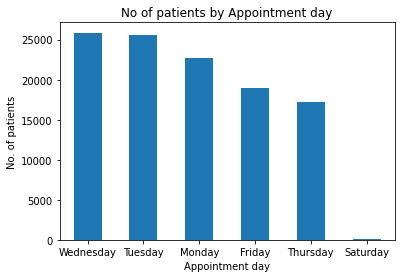

In [84]:
# plotting value counts above on a bar chart
ax = df_clean['Day'].value_counts().plot(
        kind='bar',
        title = 'No of patients by Appointment day',
        rot=0)
ax.set_xlabel('Appointment day')
ax.set_ylabel('No. of patients');

In [85]:
# creating a pivot table
dow = df_clean.groupby(['Day','NoShow'],as_index=False).size()
dow_pivot = pd.pivot(dow, index='Day',columns='NoShow',values='size')
dow_pivot

NoShow,No,Yes
Day,,
Friday,14982,4037
Monday,18024,4690
Saturday,30,9
Thursday,13909,3338
Tuesday,20488,5152
Wednesday,20774,5093


In [86]:
#number of patients who had their appointment on a Monday
mon_count = df_clean.query('Day == "Monday"').count().Day
# number of monday appointments who showed up
mon_show = df_clean.query('Day == "Monday" & NoShow == "No"').count().Day
# calculating probability
mon_show_prob = probability(mon_show,mon_count)
round(mon_show_prob,2)

0.79

The probability of a patient who had their appointment on a Monday showing up is 0.79

In [87]:
# number of patients who had their appointments on a Tuesday
tue_count = df_clean.query('Day == "Tuesday"').count().Day
# number of Tuesday appointments who showed up
tue_show = df_clean.query('Day == "Tuesday" & NoShow == "No"').count().Day
# calculating probability
tue_show_prob = probability(tue_show,tue_count)
round(tue_show_prob,2)

0.8

The probability of a patient who had their appointment on a Tuesday showing up is 0.8

In [88]:
# number of patients who had their appointments on a Wednesday
wed_count = df_clean.query('Day == "Wednesday"').count().Day
# number of Wednesday appointments who showed
wed_show = df_clean.query('Day == "Wednesday" & NoShow == "No"').count().Day
# calculating probability
wed_show_prob = probability(wed_show,wed_count)
round(wed_show_prob,2)

0.8

The probability of a patient who had their appointment on a Wednesday showing up is 0.8

In [89]:
# number of patients who had their appointments on a Thursday
thurs_count = df_clean.query('Day == "Thursday"').count().Day
# number of Thursday appointments who showed
thurs_show = df_clean.query('Day == "Thursday" & NoShow == "No"').count().Day
# calculating probability
thurs_show_prob = probability(thurs_show,thurs_count)
round(thurs_show_prob,2)

0.81

The probability of a patient whp had their appointment on a Thursday showing up is 0.81

In [90]:
# number of patients who had their appointments on a Friday
fri_count = df_clean.query('Day == "Friday"').count().Day
# number of Friday appointments who showed up
fri_show = df_clean.query('Day == "Friday" & NoShow == "No"').count().Day
# calculating probability
fri_show_prob = probability(fri_show,fri_count)
round(fri_show_prob,2)

0.79

The probability of a patient with appointment on a Friday showing up is 0.79

In [91]:
# number of patients who had their appointments on a Saturday
sat_count = df_clean.query('Day == "Saturday"').count().Day
# number of Saturday appointments who showed
sat_show = df_clean.query('Day == "Saturday" & NoShow == "No"').count().Day
# calculating probability
sat_show_prob = probability(sat_show,sat_count)
round(sat_show_prob,2)

0.77

The probability of a patient who had their appointment on a Saturday showing up is 0.77

Aside Saturday, the probability of a patient with an appointment on each of the other days is almost the same therefore I maintain that day of appointment is not significant in predicting whether a patient will show up or not.

### Age

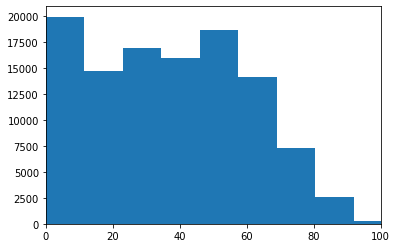

In [92]:
# plotting distribution of ages
bins = np.arange(0,df_clean['Age'].max()+10,10)
plt.hist(data=df_clean,x='Age',bins=10)
plt.xlim((0,100));

In [93]:
# breaking ages down into categories
conditions = [(df_clean['Age'] <= 12),
             (df_clean['Age'] > 12)&(df_clean['Age'] <= 18),
             (df_clean['Age'] > 18)&(df_clean['Age'] <= 60),
             (df_clean['Age'] > 60)]
values = ['child','teenager','adult','elderly']
df_clean['AgeCategory'] = np.select(conditions,values)

In [94]:
# checking distribution of age breakdown
df_clean['AgeCategory'].value_counts()

adult       61898
child       21036
elderly     19762
teenager     7830
Name: AgeCategory, dtype: int64

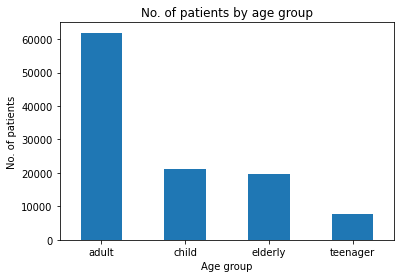

In [95]:
# plotting value counts above in a bar chart
ax = df_clean['AgeCategory'].value_counts().plot(
        kind='bar',
        title = 'No. of patients by age group',
        rot=0)
ax.set_xlabel('Age group')
ax.set_ylabel('No. of patients');

In [96]:
# creating a pivot table
age_cat = df_clean.groupby(['AgeCategory','NoShow'],as_index=False).size()
ac_pivot = pd.pivot(age_cat, index='AgeCategory',columns='NoShow',values='size')
ac_pivot

NoShow,No,Yes
AgeCategory,,
adult,48932,12966
child,16729,4307
elderly,16756,3006
teenager,5790,2040


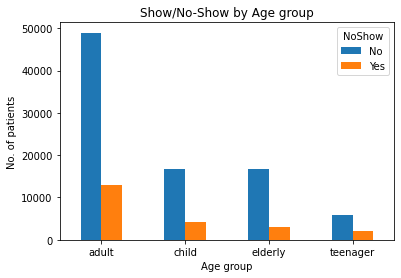

In [97]:
# plotting pivot table on a grouoed bar chart
ax = ac_pivot.plot(
        kind = 'bar',
        title = 'Show/No-Show by Age group',
        rot=0)
ax.set_xlabel('Age group')
ax.set_ylabel('No. of patients');

In [98]:
# number of children
child_count = df_clean.query('AgeCategory == "child"').count().AgeCategory
#number of children who showed
child_show = df_clean.query('AgeCategory == "child" & NoShow == "No"').count().AgeCategory
# calculating probability
child_show_prob = probability(child_show,child_count)
round(child_show_prob,2)

0.8

The probability of a child patient showing up is 0.8

In [99]:
# number of teenagers
teen_count = df_clean.query('AgeCategory == "teenager"').count().AgeCategory
#number of teenagers who showed
teen_show = df_clean.query('AgeCategory == "teenager" & NoShow == "No"').count().AgeCategory
# calculating probability
teen_show_prob = probability(teen_show,teen_count)
round(teen_show_prob,2)

0.74

The probability of a teenage patient showing up is 0.74

In [100]:
# number of adults
adult_count = df_clean.query('AgeCategory == "adult"').count().AgeCategory
# number of adults who showed up
adult_show = df_clean.query('AgeCategory == "adult" & NoShow == "No"').count().AgeCategory
# calculating probability
adult_show_prob = probability(adult_show,adult_count)
round(adult_show_prob,2)

0.79

The probability of an adult patient showing up is 0.79

In [101]:
# number of elderly patients
elderly_count = df_clean.query('AgeCategory == "elderly"').count().AgeCategory
# number of elderly patients who showed up
elderly_show = df_clean.query('AgeCategory == "elderly" & NoShow == "No"').count().AgeCategory
# calculating probability
elderly_show_prob = probability(elderly_show,elderly_count)
round(elderly_show_prob,2)

0.85

The probability of an elderly patient showing up is 0.85

* Given the varying probabilities across the age groups, age is an important factor in predicting whether a patient will show up for their appointment.

<a id='conclusions'></a>
## Conclusions

Individual independent variables that can be used in prediction include:
* Scholarship
* SMS received
* Hypertension
* Handicap
* Age

### Limitations

Even though some of the independent variables like gender and alcoholism can not be used singularly to predict whether a patient will show up, combining them with other independent variables may give them some predictive power or effect on the dependent variable.This study did not investigate a combination of independent variables on the dependent variable so conclusions drawn are for the the independent variables just as they are. 